# GRIP @ The Sparks Foundation - Data Science and Business Analytics

# Task 1: Prediction using Supervised Machine Learning

### Author: DANIEL JOSEPH RAJ I

## Objective:

Predict the percentage of an student based on the number of hours they study per day using Simple Linear Regression technique on the student marks dataset. Also predict the score if a student studies for 9.25 hrs/ day? 

### Importing all the required libraries:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading the dataset


In [3]:
data = pd.read_csv("http://bit.ly/w-data") #Importing data using remote link
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Feature Exploration

In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


From the above output, we can see that there is no missing values in the dataset.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above table, we can observe that the average study hours of the student is 5.01 hours and the average scores of the student is 51.48


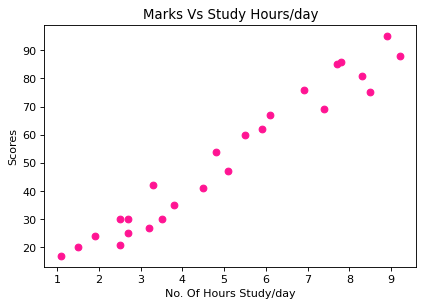

In [16]:
## Plotting Scatter plot between the response vaiable and the exploratory variable

plt.figure(dpi=80)
plt.scatter(data['Hours'],data['Scores'],color = "deeppink")
plt.title("Marks Vs Study Hours/day")
plt.xlabel("No. Of Hours Study/day")
plt.ylabel("Scores");

In [73]:
## Pearson Correlation

correlations = data.corr(method='pearson')
print(correlations)

          Hours   Scores
Hours   1.00000  0.97619
Scores  0.97619  1.00000


From the above plot and matrix, we can see that there is a highly positive linear correlation betweeen the 2 variables. So we can conclude that, the when the no. of study hours increases the percentage scores will also increase.

### Data Preparation

In [14]:
## Convert the data into array type

X = data.iloc[:, :-1]       #attributes
y = data.iloc[:,1].values   #labels

In [15]:
## SPlit data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50)

### Model Building


In [16]:
## Training the algorithm

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Coefficient:", lr.coef_)
print("Intercept  :", lr.intercept_)

Coefficient: [9.59563563]
Intercept  : 2.8102364628265804


Here the model equation is,
### Scores = 2.81032 + 9.59563 * (Hours)

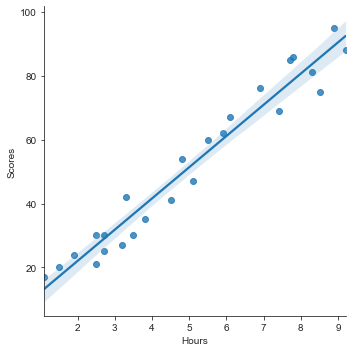

In [18]:
## Plotting the Regression Line

sns.lmplot("Hours","Scores", data)
sns.set_style("ticks");

### Scoring

In [18]:
y_pred_test = lr.predict(X_test)

## Comparing Actual vs Predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


### Model Evaluation

In [23]:
print ('R2 score           :', round(r2_score(y_test, y_pred_test),5))
print ('Mean Squared Error :', round(mean_squared_error(y_test, y_pred_test),5))
print ('Mean Absoulte Error:', round(mean_absolute_error(y_test, y_pred_test),5))

R2 score           : 0.97101
Mean Squared Error : 25.58408
Mean Absoulte Error: 4.59165


### Predicting the score if a student studies for 9.25 hrs/ day


In [20]:
test_x = [[9.25]] # X has to be a 2-D array

print(f"Predicted Score, When a student studies {test_x[0][0]} hours per day is equal to", round(lr.predict(test_x)[0],2))

Predicted Score, When a student studies 9.25 hours per day is equal to 91.57


## Conclusion:

1. The model equation built to predict the Scores of the students is, Scores = 2.81032 + 9.59563 * (Hours)
2. From the estimated co-efficients, we can conclude that, when the study hour per day increases by 1 unit then the marks increases by 9.59563 units.
3. Here, the R-squared value is 0.9710, which indicates that 97.1% of the variance of the dependent variable (Scores) is explained by the variance of the independent variable (Study_hours/day).
4. If a student studies for 9.25 hours/day, then the predicted score is equals to 91.57